In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
from pytracer.neutron_chain import generate_p_matrix, interpolate_p

-8.14554242157
-8.7476024129


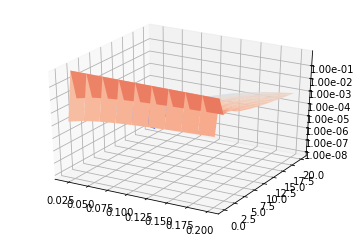

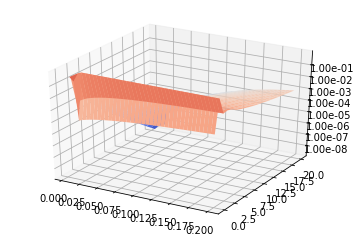

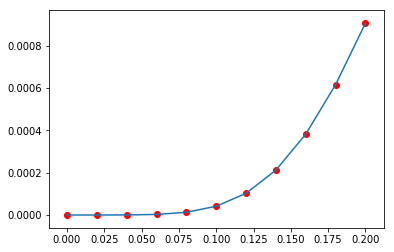

In [6]:
nu_u235_induced = \
    np.array([0.0237898, 0.1555525, 0.3216515, 0.3150433, 0.1444732, 0.0356013, 0.0034339, 0.0004546])
nu_u238_induced = \
    np.array([0.0798571, 0.2467090, 0.3538440, 0.2356090, 0.0772832, 0.0104521, 0.0006964])
nu_pu239_induced = \
    np.array([0.0084842, 0.079003, 0.2536175, 0.328987, 0.2328111, 0.0800161, 0.0155581, 0.001176, 0.0003469])
nu_pu240_induced = \
    np.array([0.0631852, 0.2319644, 0.3333230, 0.2528207, 0.0986461, 0.0180199, 0.0020406])
nu_u235_spontaneous = \
    np.array([0.0481677, 0.2485215, 0.4253044, 0.2284094, 0.0423438, 0.0072533])
nu_pu240_spontaneous = \
    np.array([0.0631852, 0.2319644, 0.3333230, 0.2528207, 0.0986461, 0.0180199, 0.0020406])

p_range = np.linspace(0, 0.2, 10 + 1)
p_matrix, p_range = generate_p_matrix(nu_pu239_induced, 'pu239', max_n=20, p_range=p_range)

def log_tick_formatter(val, pos=None):
    return "{:.2e}".format(10 ** val)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs, ys = np.meshgrid(p_range[1:], list(range(p_matrix.shape[1])))

minz = np.log10(min(p_matrix[p_matrix > 0.0]))
print(minz)

surf = ax.plot_surface(xs, ys, np.log10(p_matrix[1:].T), cmap=cm.coolwarm,
                       norm=colors.Normalize(vmin=minz, vmax=1.0))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
exp_prange = np.linspace(0, 0.2, 40 + 1)
xs, ys = np.meshgrid(exp_prange[1:], list(range(p_matrix.shape[1])))
exp_pmatrix = np.zeros((len(exp_prange), 21))

for i in range(len(exp_prange)):
    exp_pmatrix[i] = interpolate_p(p_matrix, exp_prange[i], p_range)

minz = np.log10(min(exp_pmatrix[exp_pmatrix > 0.0]))
print(minz)

surf = ax2.plot_surface(xs, ys, np.log10(exp_pmatrix[1:].T), cmap=cm.coolwarm,
                        norm=colors.Normalize(vmin=minz, vmax=1.0))
ax2.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))

plt.figure()
plt.plot(exp_prange, exp_pmatrix[:, -1])
plt.scatter(p_range, p_matrix[:, -1], marker='o', c='red')

plt.show()